<a href="https://colab.research.google.com/github/betussi/IA/blob/main/EAFC25_PredictPromisingPlayers_TreeDecisionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Carregar o dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/male_players.csv')

In [ ]:
# Exibir as primeiras linhas do dataset para entender sua estrutura
print(df.head())

   Unnamed: 0.1  Unnamed: 0  Rank             Name  OVR  PAC  SHO  PAS  DRI  \
0             0           0     1    Kylian Mbappé   91   97   90   80   92   
1             1           1     2            Rodri   91   66   80   86   84   
2             2           2     4   Erling Haaland   91   88   92   70   81   
3             3           3     5  Jude Bellingham   90   80   87   83   88   
4             4           4     7         Vini Jr.   90   95   84   81   91   

   DEF  ...   Nation            League             Team  \
0   36  ...   France  LALIGA EA SPORTS      Real Madrid   
1   87  ...    Spain    Premier League  Manchester City   
2   45  ...   Norway    Premier League  Manchester City   
3   78  ...  England  LALIGA EA SPORTS      Real Madrid   
4   29  ...   Brazil  LALIGA EA SPORTS      Real Madrid   

                                          play style  \
0  Quick Step+, Acrobatic, Finesse Shot, Flair, R...   
1  Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...   
2 

In [ ]:
# Selecionar as características relevantes para o modelo de árvore de decisão
features = ['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']
target = 'OVR'

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Criar e treinar o modelo de árvore de decisão
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

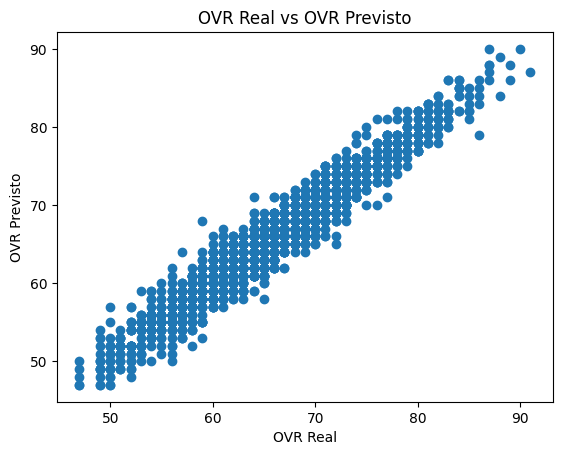

In [ ]:
# Plotar os resultados
plt.scatter(y_test, y_pred)
plt.xlabel('OVR Real')
plt.ylabel('OVR Previsto')
plt.title('OVR Real vs OVR Previsto')
plt.show()

In [ ]:
# Imprimir a importância das características do modelo
importances = pd.DataFrame(model.feature_importances_, features, columns=['Importance'])
print(importances)

     Importance
PAC    0.014087
SHO    0.055770
PAS    0.021787
DRI    0.586909
DEF    0.273280
PHY    0.048167


In [ ]:
# Prever jogadores promissores com base em seus atributos
df['Predicted_OVR'] = model.predict(df[features])
promising_players = df[df['Predicted_OVR'] > df['OVR']]
print(promising_players[['Name', 'OVR', 'Predicted_OVR']])

                 Name  OVR  Predicted_OVR
15         Phil Foden   88           89.0
31       Paulo Dybala   87           88.0
33          Neymar Jr   87           88.0
41     İlkay Gündoğan   87           90.0
99     Kingsley Coman   84           86.0
...               ...  ...            ...
16106    Irfan Yadwad   49           51.0
16107   Yan Bingliang   49           54.0
16156    Engson Singh   47           49.0
16158        Wei Feng   47           50.0
16159      Won Hui Do   47           48.0

[1170 rows x 3 columns]
